In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('ttrain.csv')
df2 = pd.read_csv('ttest.csv')

In [3]:
df1.shape
df2.shape

(418, 11)

In [4]:
df=pd.concat([df1, df2])

In [5]:
df.shape

(1309, 12)

### EDA - Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
436,437,0.0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q
175,176,0.0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
374,1266,NaN,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S
236,1128,NaN,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,D37,C
94,986,NaN,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C
230,231,1.0,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
370,1262,NaN,2,"Giles, Mr. Edgar",male,21.0,1,0,28133,11.5000,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S


In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Data Visulations

<Axes: >

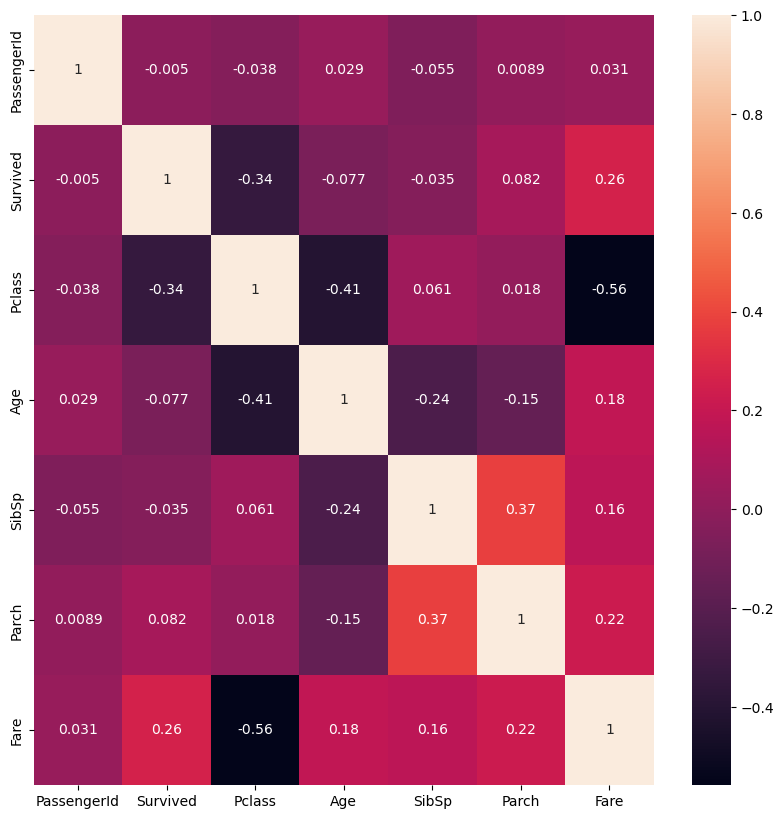

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Embarked', ylabel='count'>

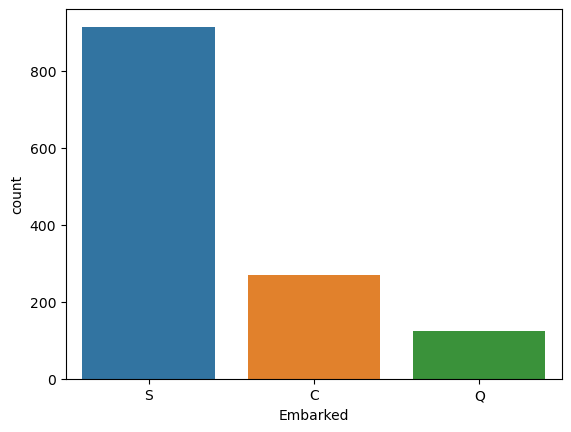

In [14]:
sns.countplot(x=df['Embarked'])

<Axes: xlabel='Embarked', ylabel='count'>

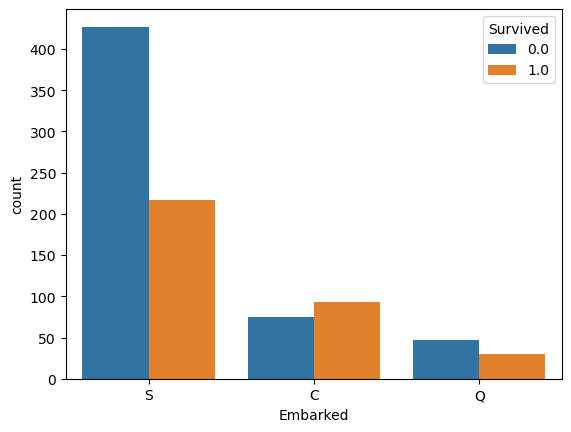

In [15]:
# Survival states by port of embarkation
sns.countplot(x='Embarked', hue='Survived', data=df)

### Feature Engineering

In [16]:
df['Embarked'].mode() # Most recurring value

0    S
Name: Embarked, dtype: object

In [17]:
df['Embarked'].value_counts(normalize=True) # Display as percent

Embarked
S    0.699311
C    0.206580
Q    0.094109
Name: proportion, dtype: float64

In [18]:
# Find it mod and fill it with bigger Embarked value

# df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode
df['Embarked']=df['Embarked'].fillna('S') 

In [19]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [20]:
# Two ways to delete cabin column because more than 70% of data is empty

del df['Cabin']
# df.drop('Cabin', axis=1, inplace=True)

In [21]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [22]:
df['Fare'].mean(), df['Fare'].max(), df['Fare'].min(), df['Fare'].std(), df['Fare'].median()

(33.29547928134557, 512.3292, 0.0, 51.75866823917414, 14.4542)

In [23]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [24]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
847,848,0.0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,C
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
491,492,0.0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,S
377,1269,NaN,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,S
121,122,0.0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
483,484,1.0,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,S
279,280,1.0,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,S
496,497,1.0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,C
218,219,1.0,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,C


In [25]:
# Extracting Mr Mrs expressions in #Name column

df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [27]:
# Delete #Name column because we dont need anymore
df.drop('Name', axis=1, inplace=True)

In [28]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [29]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [30]:
df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [31]:
# Change data with Mr, Mrs or Miss

df['Title']=df['Title'].replace(["Ms","Mlle"], "Miss")
df['Title']=df['Title'].replace(["Mme","Countess","Lady","Dona"], "Mrs")
df['Title']=df['Title'].replace(["Rev","Jonkheer","Sir","Don","Major","Dr", "Capt","Col"], "Mr")

In [32]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [33]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [34]:
df.groupby("Sex")["Age"].mean() # Average age of men and women

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [35]:
df[df["Age"]<18]["Age"].mean() # Average of under 18s

9.101753246753248

In [36]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [37]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [38]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [39]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [40]:
# axis=1 column, row deletion if 0
df.drop(["PassengerId","Ticket"], axis=1, inplace=True)

In [41]:
# Converting text to numbers
data= pd.get_dummies(df,drop_first=True)

In [42]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,True,False,True,False,True,False
1,1.0,1,38.0,1,0,71.2833,2,False,False,False,False,False,True
2,1.0,3,26.0,0,0,7.9250,1,False,False,True,True,False,False
3,1.0,1,35.0,1,0,53.1000,2,False,False,True,False,False,True
4,0.0,3,35.0,0,0,8.0500,1,True,False,True,False,True,False


In [43]:
train=data[:891]
test=data[891: ]

In [44]:
x=train.drop("Survived", axis=1)
y=train["Survived"]

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Modelleri tanımlayalım
g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

# Toplu Classification Model Eğitimi Fonksiyonu
def classification_fun(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    for model in modeller:
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(tahmin, y_test))
        precision.append(precision_score(tahmin, y_test))
        recall.append(recall_score(tahmin, y_test))
        f1.append(f1_score(tahmin, y_test))
        
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("The most successful model: ", metrics.iloc[0].name)
    print(classification_report(metrics.iloc[0,-1].predict(x_test), y_test))
    
    return metrics.drop("Model", axis=1)

In [50]:
classification_fun(x,y)

The most successful model:  GradientBoostingClassifier
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       109
         1.0       0.76      0.80      0.78        70

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



,Accuracy,Precision,Recall,F1
GradientBoostingClassifier,0.821229,0.756757,0.800000,0.777778
RandomForestClassifier,0.815642,0.770270,0.780822,0.775510
LogisticRegression,0.810056,0.743243,0.785714,0.763889
BernoulliNB,0.787709,0.716216,0.757143,0.736111
DecisionTreeClassifier,0.776536,0.743243,0.723684,0.733333
GaussianNB,0.782123,0.702703,0.753623,0.727273
KNeighborsClassifier,0.743017,0.621622,0.718750,0.666667


In [54]:
del test["Survived"]

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

g=GaussianNB()
b=BernoulliNB()

In [ ]:
g.fit(x,y)
b.fit(x,y)

In [ ]:
test.head()

In [ ]:
# GaussianNB

In [ ]:
guess1=g.predict(test)

In [ ]:
result=df2[["PassengerId"]]

In [ ]:
result.head(10)

In [ ]:
result["Survived"]=guess1

In [ ]:
result

In [ ]:
result["Survived"]=result["Survived"].astype("int64")

In [ ]:
result

In [ ]:
result.sample(10)

In [ ]:
result.to_csv("titanicPredictionGaus.csv", index=False)

In [ ]:
# BernoulliNB

In [ ]:
guess2=b.predict(test)

In [ ]:
result=df2[["PassengerId"]]

In [ ]:
result.head(10)

In [ ]:
result["Survived"]=guess2

In [ ]:
result["Survived"]=result["Survived"].astype("int64")

In [ ]:
result.to_csv("titanicPredictionBern.csv", index=False)

In [ ]:
# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [ ]:
k.fit(x,y)

In [ ]:
guess3=k.predict(test)

In [ ]:
result=df2[["PassengerId"]]

In [ ]:
result["Survived"]=guess3

In [ ]:
result["Survived"]=result["Survived"].astype("int64")

In [ ]:
result.to_csv("titanicPredictionKNeig.csv", index=False)

In [ ]:
# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [ ]:
l.fit(x,y)

In [ ]:
guess4=l.predict(test)

In [ ]:
result=df2[["PassengerId"]]

In [ ]:
result["Survived"]=guess4

In [ ]:
result["Survived"]=result["Survived"].astype("int64")

In [ ]:
result.to_csv("titanicPredictionLogis.csv", index=False)

In [ ]:
# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [ ]:
d.fit(x,y)

In [ ]:
guess5=d.predict(test)

In [ ]:
result=df2[["PassengerId"]]

In [ ]:
result["Survived"]=guess5

In [ ]:
result["Survived"]=result["Survived"].astype("int64")

In [ ]:
result.to_csv("titanicPredictionDecis.csv", index=False)

In [ ]:
# RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [63]:
r.fit(x,y)

RandomForestClassifier()

In [64]:
guess6=r.predict(test)

In [65]:
result=df2[["PassengerId"]]

In [66]:
result["Survived"]=guess6

In [67]:
result["Survived"]=result["Survived"].astype("int64")

In [68]:
result.to_csv("titanicPredictionRF.csv", index=False)

In [ ]:
# GradientBoostingClassifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [55]:
gb.fit(x,y)

GradientBoostingClassifier()

In [56]:
guess7=r.predict(test)

In [57]:
result=df2[["PassengerId"]]

In [58]:
result["Survived"]=guess7

In [59]:
result["Survived"]=result["Survived"].astype("int64")

In [61]:
result.to_csv("titanicPredictionGB.csv", index=False)